In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image 

In [4]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [5]:
BATCH_SIZE = 3
train_dataset = train.flow_from_directory('train/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')
test_dataset = test.flow_from_directory('test/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'matang': 0, 'mentah': 1}

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 48, 48, 32)       

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
EPOCH = 10
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=test_dataset) 

Epoch 1/10
24/24 [==============================] - 39s 2s/step - loss: 1.0156 - accuracy: 0.4571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 33s 1s/step - loss: 0.6913 - accuracy: 0.5571 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
24/24 [==============================] - 33s 1s/step - loss: 0.6982 - accuracy: 0.5429 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/10
24/24 [==============================] - 33s 1s/step - loss: 0.6900 - accuracy: 0.5571 - val_loss: 0.6930 - val_accuracy: 0.5667
Epoch 5/10
24/24 [==============================] - 33s 1s/step - loss: 0.6990 - accuracy: 0.5286 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
24/24 [==============================] - 33s 1s/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
24/24 [==============================] - 33s 1s/step - loss: 0.6906 - accuracy: 0.5857 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
24/24 [==

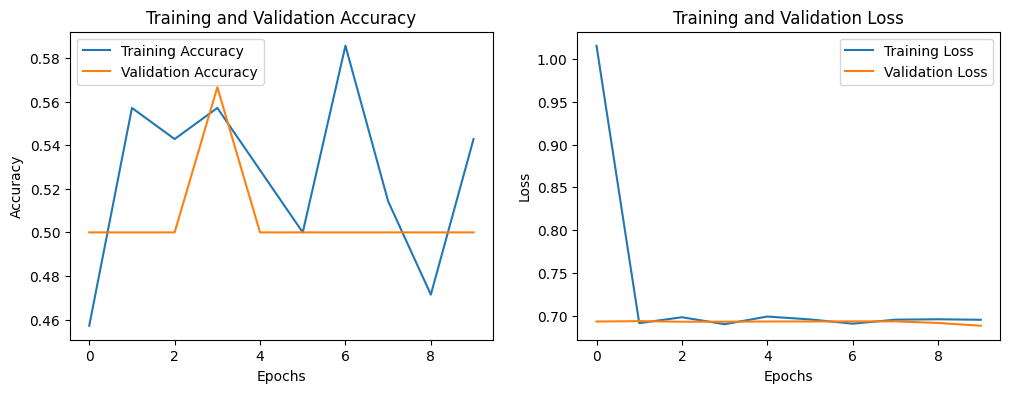

In [17]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()